# 1-12-23

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import requests
import urllib

In [81]:
df=pd.read_csv('DATA/used_cars.csv')
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   int64  
 1   trim          1000 non-null   object 
 2   isOneOwner    1000 non-null   object 
 3   mileage       1000 non-null   float64
 4   year          1000 non-null   int64  
 5   color         1000 non-null   object 
 6   displacement  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [83]:
df.isna().sum()

price           0
trim            0
isOneOwner      0
mileage         0
year            0
color           0
displacement    0
dtype: int64

## Isolate Numeric Columns

In [84]:
df_numeric=df[['price', 'mileage', 'year']]
df_numeric

,price,mileage,year
0,43995,36858.0,2008
1,44995,46883.0,2012
2,25999,108759.0,2007
3,33880,35187.0,2007
4,34895,48153.0,2007
...,...,...,...
995,36995,89589.0,2007
996,72991,5562.0,2013
997,38990,61716.0,2010
998,58998,40219.0,2012


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,30583.318,18411.018385,995.0,12995.00,29800.0,43992.00,79995.0
mileage,1000.0,73652.408,42887.422189,1997.0,40132.75,67919.5,100138.25,255419.0
year,1000.0,2006.939,4.194624,1994.0,2004.00,2007.0,2010.00,2013.0


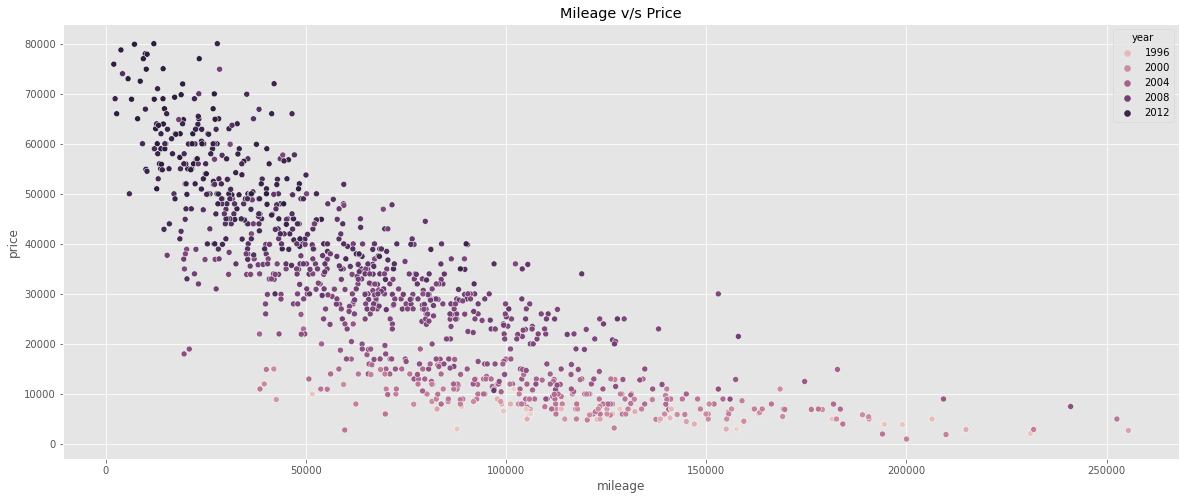

In [86]:
sns.scatterplot(x=df['mileage'], y=df['price'], hue=df['year'])
plt.title('Mileage v/s Price');

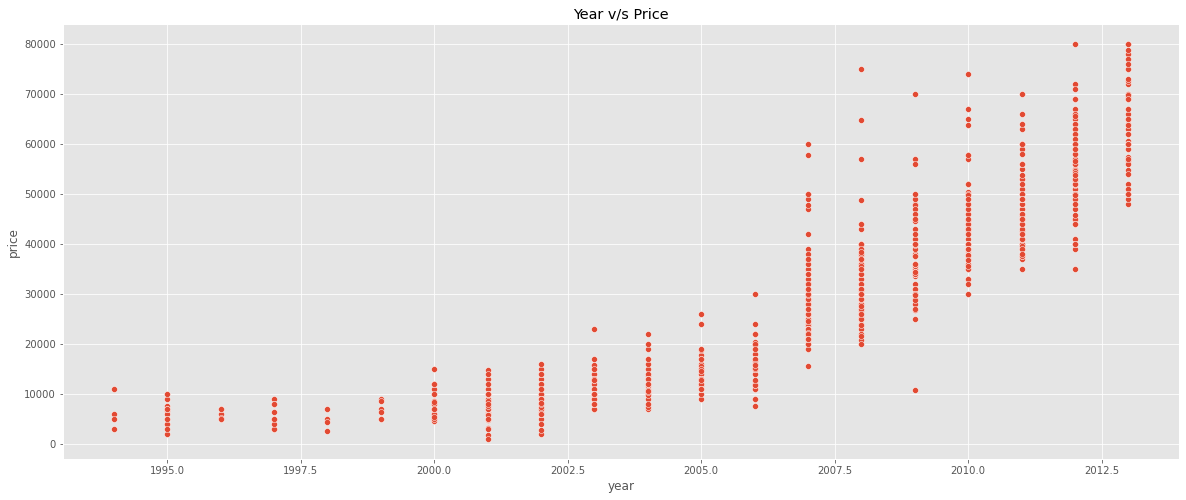

In [87]:
sns.scatterplot(x=df['year'], y=df['price'])
plt.title('Year v/s Price');

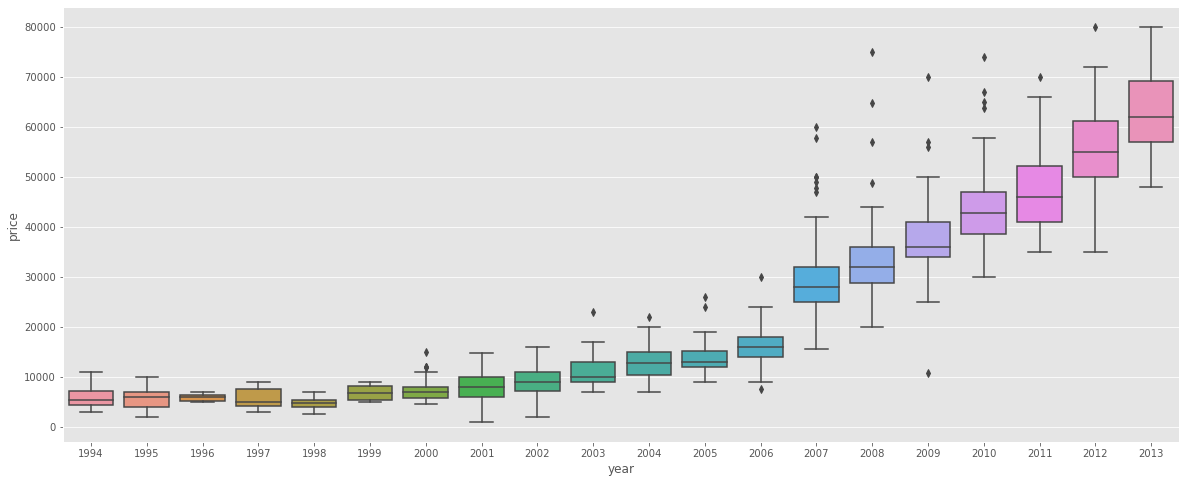

In [88]:
sns.boxplot(x=df['year'], y=df['price']);

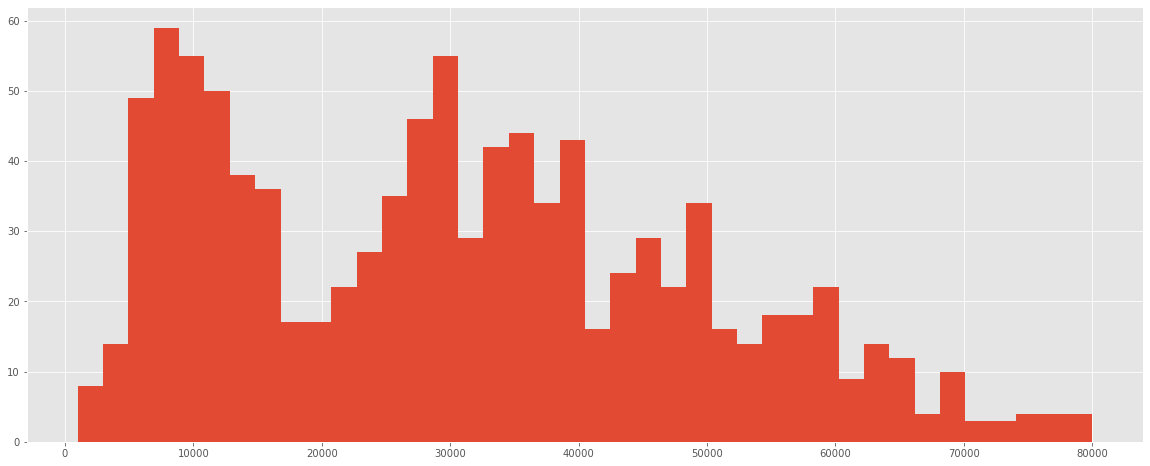

In [89]:
plt.hist(df['price'], bins=40);

## Add Color Column

In [90]:
df_categorical=df[['price', 'mileage', 'year', 'color']]
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    1000 non-null   int64  
 1   mileage  1000 non-null   float64
 2   year     1000 non-null   int64  
 3   color    1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [91]:
df_categorical['color'].value_counts()

Black     415
other     227
Silver    213
White     145
Name: color, dtype: int64

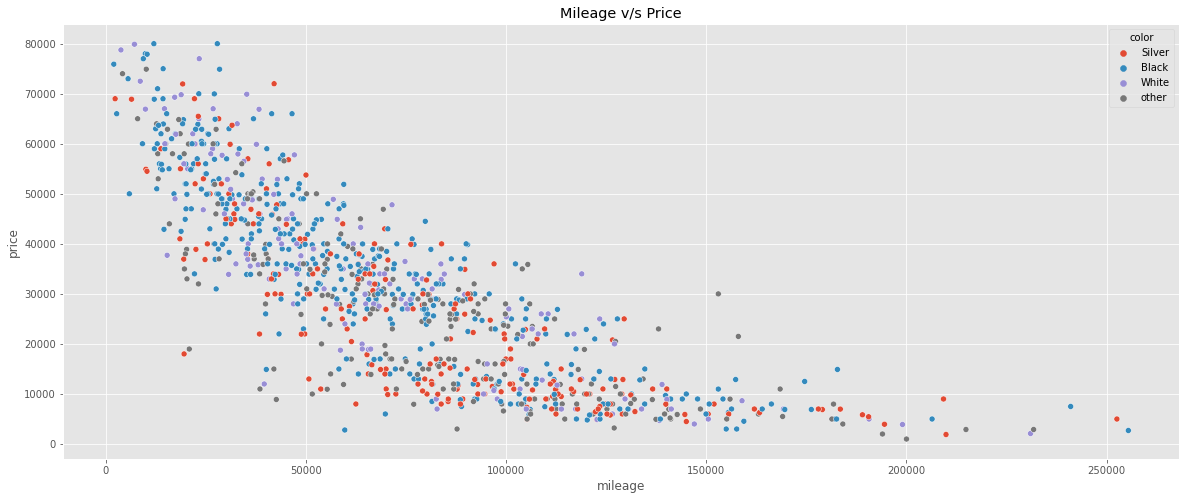

In [92]:
sns.scatterplot(x=df['mileage'], y=df['price'], hue=df['color'])
plt.title('Mileage v/s Price');

## Regression with Mileage

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(df['price']).reshape((-1, 1))
y = np.array(df['mileage'])

model = LinearRegression().fit(x, y) 

In [94]:
model.intercept_

131732.23253086765

In [95]:
model.coef_

array([-1.89906878])

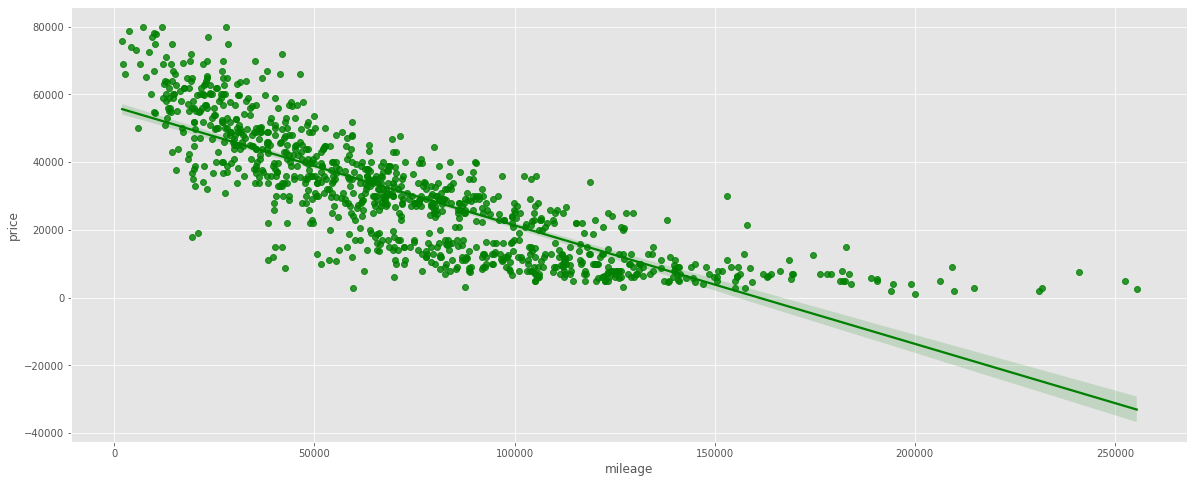

In [96]:
sns.regplot(x=df['mileage'], y=df['price'], color='g');

# 1-17-23

In [102]:
import statsmodels.api as sm

## Using Mileage & Color to get the Price

In [106]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


In [107]:
from sklearn.preprocessing import LabelEncoder
categorical = ['color']

le = LabelEncoder()
for col in categorical:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [108]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,1,5.5
1,44995,550,f,46883.0,2012,0,4.6
2,25999,550,f,108759.0,2007,2,5.5
3,33880,550,f,35187.0,2007,0,5.5
4,34895,550,f,48153.0,2007,0,5.5


In [110]:
df['mileage']=df['mileage'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1000 non-null   int64 
 1   trim          1000 non-null   object
 2   isOneOwner    1000 non-null   object
 3   mileage       1000 non-null   int64 
 4   year          1000 non-null   int64 
 5   color         1000 non-null   int64 
 6   displacement  1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [111]:
x=df[['mileage', 'color']]
y=df['price']

In [112]:
model=sm.OLS(y,x).fit()
preds=model.predict(x)

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.352
Method:                 Least Squares   F-statistic:                              272.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):                    2.90e-95
Time:                        21:50:32   Log-Likelihood:                         -11684.
No. Observations:                1000   AIC:                                  2.337e+04
Df Residuals:                     998   BIC:                                  2.338e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage        0.1254      0.014      8.972      0.000       0.098       0.153
color       7534.2272    707.060     10.656      0.000    6146.732    8921.722
==============================================================================
Omnibus:                       61.519   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.473
Skew:                           0.166   Prob(JB):                     1.78e-06
Kurtosis:                       2.275   Cond. No.                     6.63e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

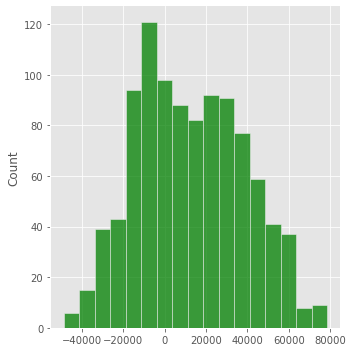

In [123]:
residuals=y-preds
sns.displot(residuals, color='g');